# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Raihan Shafa Azzumar Yussuf
- **Email:** razzumaryussuf@student.uns.ac.id
- **ID Dicoding:** raihanshafa

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kecepatan angin (windspeed) terhadap total jumlah peminjaman sepeda (count_cr)?
- Apakah terdapat perbedaan dalam jumlah peminjaman sepeda bedasarkan jenis musim (season)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Penggabungan antara dua data dari sumber yang berbeda, perlu diperiksa apakah ada perbedaan pada struktur dari data tersebut, karena hal ini mempengaruhi proses analisis lebih lanjut, ada kemungkinan perlu adanya standarisasi struktur sebelum melanjutkan projek
- Perubahan ukuran dataset sangat penting untuk dipahami apakah data yang digunakan cukup relevan dan mewakilkan untuk dianalisis. ukuran dataset sangat kecil setelah penggabungan sangat diperlukan mencari sumber data tambahan agar mendapatkan hasil yang akurat

### Assessing Data

In [5]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [6]:
# mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
# memeriksa duplikasi
print("Jumlah duplikasi hour.csv: ", hour_df.duplicated().sum())
print("Jumlah duplikasi day.csv : ", day_df.duplicated().sum())


Jumlah duplikasi hour.csv:  0
Jumlah duplikasi day.csv :  0


In [9]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Penting untuk memastikan bahwa tipe data sesuai dengan konteks penggunaannya, karena penggunaan tipe data yang tidak tepat dapat menyebabkan kesalahan dalam analisis, seperti kesalahan saat mengurutkan atau memanipulasi data tanggal. Setelah melakukan analisis statistik deskriptif menggunakan df.describe(), kita mungkin menemukan bahwa beberapa kolom numerik memiliki distribusi yang tidak normal atau terdapat outlier yang signifikan. Sebagai contoh, kolom cnt (jumlah pengunjung) bisa menunjukkan perbedaan besar antara nilai minimum dan maksimumnya.



### Cleaning Data

In [11]:
print(day_df.isnull().sum())

day_df.dropna(inplace=True)

print(day_df.duplicated().sum())

day_df.drop_duplicates(inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0


In [12]:
print(hour_df.isnull().sum())

hour_df.dropna(inplace=True)

print(hour_df.duplicated().sum())

hour_df.drop_duplicates(inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0


**Mengubah tipe data**

In [13]:
# mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [14]:
# handling tipe data dteday 'object' menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Mengubah dan mengonversi kolom**

In [15]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df & hour_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','cnt':'count_cr','hum':'humidity'},inplace=True)
hour_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','cnt':'count_cr','hum':'humidity'},inplace=True)

In [16]:
# Mengkonversi isi kolom agar mudah dipahami

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi weather_situation menjadi: 1:Sunny, 2:Foggy, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Sunny','Foggy','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Sunny','Foggy','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100


<ipython-input-16-d7d20af56920>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.year.replace((0,1), ('2011','2012'), inplace=True)
<ipython-input-16-d7d20af56920>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [17]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [18]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Sangat kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Sangat Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

cleaning yang sudah dilakukan yaitu
* memastikan data tidak berisi missing values dan duplikasi
* tipe data pada kolom dteday berubah menjadi datetime
* tipe data int pada season, mnth, holiday, weekday, workingday, weathersit sudah berubah menjadi tipe data category
* Sudah mengganti nama kolom agar lebih mudah dibaca
* Sudah Mengkonversi isi kolom agar mudah dipahami
* Sudah membuat kolom baru bernama category_days yang berisi weekend atau weekdays

## Exploratory Data Analysis (EDA)

### Explore data hour_df

In [19]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hr,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,NaN,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Sangat Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [20]:
# penyewaan berdasarkan kecepatan angin
hour_df.groupby(by="windspeed").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
windspeed,
0.0000,350203
0.0896,213804
0.1045,268821
0.1343,306423
0.1642,332998
0.1940,332407
0.2239,320678
0.2537,276880


Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang memilliki banyak menyewa sepeda terjadi pada kecepatan angin 0 sedangkan penyewaan sepeda yang paling sedikit dimiliki pada kecepatan angin 0.7761

### Explore data day_df

In [21]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,NaN,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [22]:
# melihat jumlah penyewaan tiap musim
day_df.groupby(by="season", observed=False).count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


berdasarkan hasil tersebut, diketahui bahwa season fall dan summer merupakan dua musim yang memiliki jumlah terbanyak.

**Insight:**
- Semakin rendah kecepatan angin, jumlah pengunjung cenderung meningkat hingga kecepatan persis 0. Namun, ketika kecepatan angin menjadi terlalu tinggi, jumlah pengunjung mulai menurun. Hal ini menunjukkan bahwa orang-orang lebih suka bersepeda pada saat sedikit atau bahkan tidak ada kecepatan angin.
- Jumlah pengunjung cenderung lebih tinggi pada musim berhawa panas dibandingkan dengan musim berhawa lembap atau dingin. Hal ini masuk akal karena orang-orang cenderung lebih sering beraktivitas di luar ruangan atau menggunakan layanan selama cuaca cerah, sementara pada cuaca dingin, aktivitas tersebut menurun karena orang-orang cenderung memilih untuk bersantai di rumah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kecepatan angin (windspeed) terhadap total jumlah peminjaman sepeda (count_cr)?

In [23]:
# melakukan grouping terhadap windspeed dan count_cr
sum_order_items_df = hour_df.groupby("windspeed", observed=False).count_cr.sum().sort_values(ascending=False).reset_index()

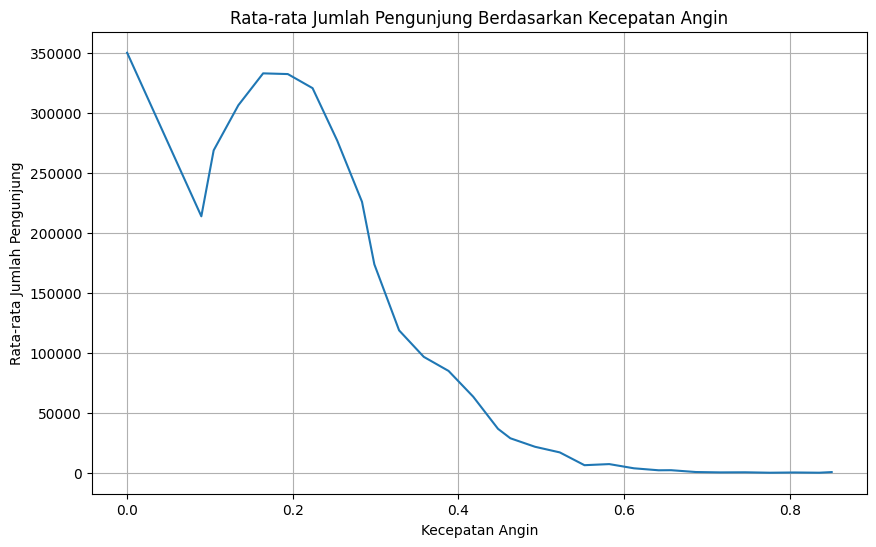

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sum_order_items_df, x='windspeed', y='count_cr')
plt.title('Rata-rata Jumlah Pengunjung Berdasarkan Kecepatan Angin')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Rata-rata Jumlah Pengunjung')
plt.grid()
plt.show()


**Insight:**
- Dari grafik, kita dapat mengamati bahwa ketika kecepatan angin meningkat dari tingkat yang lebih rendah, jumlah pengunjung melonjak menurun. Kecepatan angin yang sedikit atau bahkan tidak ada cenderung menarik lebih banyak orang untuk melakukan aktivitas di luar ruangan, yang mengarah pada peningkatan jumlah pengunjung.
- Setelah mencapai kecepatan angin tertentu (biasanya kecepatan angin rendah atau 0), jumlah pengunjung mulai meningkat. Ini menunjukkan bahwa kecepatan angin yang tinggi mungkin menjadi tidak nyaman bagi banyak orang, sehingga mereka cenderung menghindari aktivitas di luar ruangan atau menggunakan layanan yang tercatat dalam data.

### Pertanyaan 2: Apakah terdapat perbedaan dalam jumlah peminjaman sepeda bedasarkan jenis musim (season)?

<ipython-input-25-94b5e7fc2f47>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

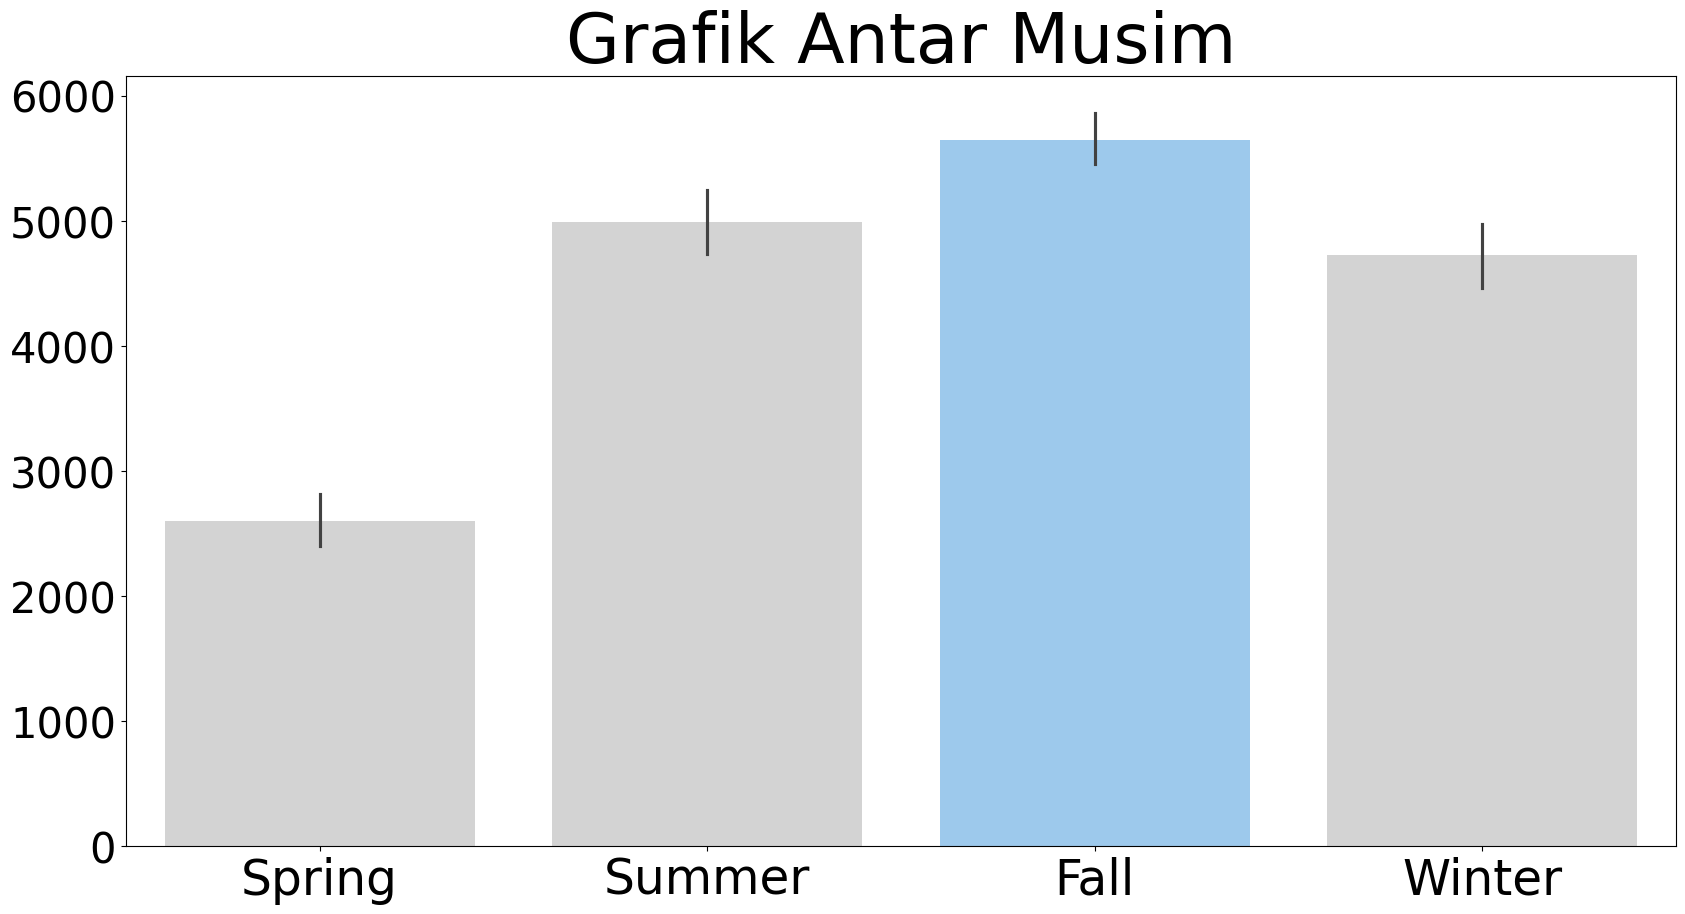

In [25]:
# mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()


**Insight:**
- Dari grafik, terlihat bahwa musim yang cuacanya senderung cerah memiliki rata-rata jumlah pengunjung yang lebih tinggi dibandingkan . Hal ini wajar, karena orang cenderung lebih banyak beraktivitas di luar atau menggunakan fasilitas tertentu selama waktu senggang, seperti pada akhir pekan atau hari libur resmi.
- Meskipun rata-rata pengunjung lebih tinggi pada hari libur, hari kerja juga memiliki jumlah pengunjung yang signifikan. Ini bisa menunjukkan bahwa orang masih menggunakan layanan atau beraktivitas, meskipun pada hari kerja, mungkin karena keperluan sehari-hari, pekerjaan, atau rutinitas lain.

## Analisis Lanjutan (Opsional)

**Analisis Clustering**

In [26]:
# Total peminjam bedasarkan humidity
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Ideal,5505
Sangat Lembab,8356
Sangat kering,3518


In [27]:
# Total peminjam bedasarkan weather_situation
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

<ipython-input-27-408201e2d0fa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


,count_cr
weather_situation,
Sunny,848
Foggy,649
Light_rainsnow,368
Heavy_rainsnow,3


dari 2 contoh analisis clustering diatas, kita dapat mengidentifikasi kelompok pengguna yang lebih cenderung menyewa pada saat sedang lembab dan pada cuaca yang cerah

## Conclusion

- Conclution pertanyaan 1 : Ada tren yang jelas antara kecepatan angin dan jumlah peminjam, yang menunjukkan bahwa semakin rendah kecepatan angin, semakin banyak peminjam yang datang
- Conclution pertanyaan 2 : Terdapat perbedaan yang signifikan dalam jumlah pengunjung antara musim yang cenderung panas dan musim yang cenderung dingin, dengan musim yang cenderung panas biasanya memiliki jumlah peminjam yang lebih tinggi.

In [28]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)